In [4]:
# --- Updated Imports and Version Check ---

# Core Python imports
import os
import warnings
from pathlib import Path
warnings.filterwarnings("ignore")

# Data manipulation
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning tools (scikit-learn, imbalanced-learn, xgboost)
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    confusion_matrix, classification_report, accuracy_score, 
    precision_score, recall_score, f1_score, roc_auc_score
)
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier

# Utility
from pprint import pprint
import sys

# --- Version Summary ---
print("Environment setup complete. Library versions:\n")
print(f"Python:        {sys.version.split()[0]}")
print(f"NumPy:         {np.__version__}")
print(f"Pandas:        {pd.__version__}")
print(f"Matplotlib:    {plt.matplotlib.__version__}")
print(f"Seaborn:       {sns.__version__}")

# Check optional ML packages
try:
    import sklearn
    print(f"Scikit-learn:  {sklearn.__version__}")
except ImportError:
    print("Scikit-learn not installed")

try:
    import imblearn
    print(f"Imbalanced-learn: {imblearn.__version__}")
except ImportError:
    print("Imbalanced-learn not installed")

try:
    import xgboost
    print(f"XGBoost:       {xgboost.__version__}")
except ImportError:
    print("XGBoost not installed")

print("\n✅ All key libraries imported successfully.")


Environment setup complete. Library versions:

Python:        3.12.7
NumPy:         1.26.4
Pandas:        2.2.2
Matplotlib:    3.9.2
Seaborn:       0.13.2
Scikit-learn:  1.5.1
Imbalanced-learn: 0.12.3
XGBoost:       3.1.0

✅ All key libraries imported successfully.


Dataset shape: (253680, 22)
Columns: ['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']

--- Full Correlation Matrix ---
                      Diabetes_binary    HighBP  HighChol  CholCheck  \
Diabetes_binary              1.000000  0.263129  0.200276   0.064761   
HighBP                       0.263129  1.000000  0.298199   0.098508   
HighChol                     0.200276  0.298199  1.000000   0.085642   
CholCheck                    0.064761  0.098508  0.085642   1.000000   
BMI                          0.216843  0.213748  0.106722   0.034495   
Smoker                       0.060789  0.096991  0.091299  -0.009929   
Stroke                       0.105816  0.129575  0.092620   0.024158   
HeartDiseaseorAttack         0.177282  0.209361  0.180765   0.044206   
Ph

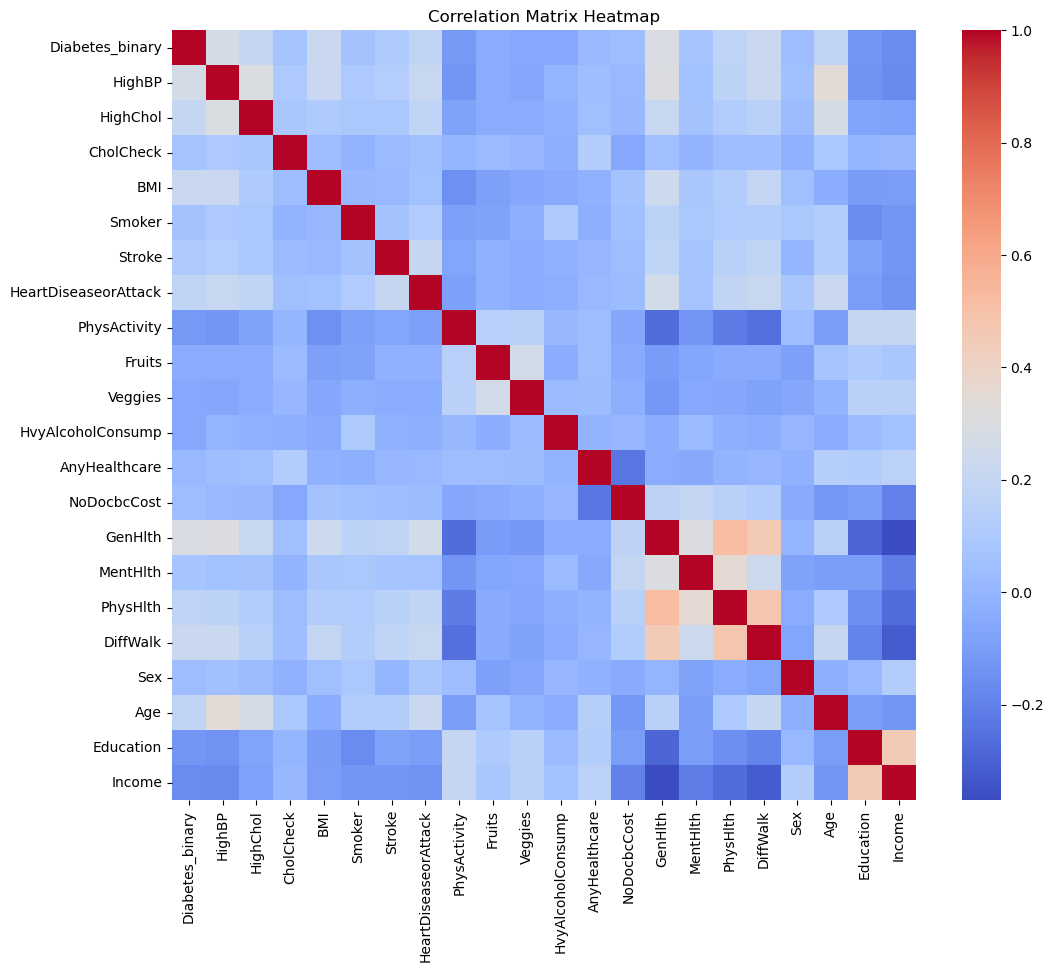

In [ ]:
# --- Correlation Analysis Section ---

import pandas as pd

# Load dataset (adjust path if needed)
csv_path = "diabetes_binary_health_indicators_BRFSS2015.csv"
df = pd.read_csv(csv_path)

# Show the dataset shape and columns
print("Dataset shape:", df.shape)
print("Columns:", df.columns.tolist())

# Ensure the target column exists
target_col = "Diabetes_binary"
if target_col not in df.columns:
    raise ValueError(f"Target column '{target_col}' not found in dataset. Please check column names.")

# --- 1. Compute and display full correlation matrix ---
corr_matrix = df.corr(numeric_only=True)
print("\n--- Full Correlation Matrix ---")
print(corr_matrix)

# --- 2. Display correlation of each metric/feature with the target variable ---
print("\n--- Correlation of each feature with 'Diabetes_binary' ---")
target_corr = corr_matrix[target_col].sort_values(ascending=False)
for feature, corr_value in target_corr.items():
    print(f"{feature:30s} : {corr_value:.4f}")

# --- visualize correlation heatmap ---
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title("Correlation Matrix Heatmap")
plt.show()
